# Описание проекта

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br><br>
В наличии данные до 2016 года. Представим, что сейчас декабрь 2016 г., планируется кампания на 2017-й.

### Проект выполнен по следующим шагам:
<a href='#step1'>Шаг 1. Загрузка файла с данными и изучение общей информации</a><br>
<a href='#step2'>Шаг 2. Подготовка данных</a><br>
<a href='#step3'>Шаг 3. Исследовательский анализ данных</a><br>
<a href='#step4'>Шаг 4. Портрет пользователя каждого региона</a><br>
<a href='#step5'>Шаг 5. Проверка гипотез</a><br>
<a href='#step6'>Шаг 6. Общий вывод</a><br>

<a id='step1'></a>
## Шаг 1. Загрузка файла с данными и изучение общей информации
<a href='#step11'>Описание данных</a><br>
<a href='#conclusion1'>Вывод 1</a><br>

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from datetime import  date
from scipy import stats as st
import seaborn as sns

#импорт необходимых библиотек

In [2]:
data = pd.read_csv('games.csv')

In [3]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Разделители распознаны корректно.<br>
Имеются пропущенные и нулевые значения.

<a id='step11'></a>
### Описание данных:
Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br><br>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Имеются пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.<br><br>
Необходимо изменить типы данных в столбцах:
1. Year_of_Release - на int (для года также подходит формат даты, однако int использовать удобнее);
2. Critic_Score - на int (не требуется точность после запятой, т.к. в рейтинге 100 баллов)
3. User_Score на float (предварительно, требуется анализ)

In [5]:
data['Rating'].value_counts(sort=False)
#вывожу уникальный значения рейтинга для проверки

M       1563
E       3990
T       2961
RP         3
AO         1
EC         8
E10+    1420
K-A        3
Name: Rating, dtype: int64

<strong>Расшифровка рейтинга ESRB</strong><br>
Источники:<br>
www.esrb.org/ratings-guide/<br>
https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board<br><br>

EC -возраст 3+<br>
E - возраст 6+ (или пользователи любого возраста)<br>
K-A - возраст 6+(или пользователи любого возраста)<br>
E10+ - возраст 10+<br>
T - возраст 13+<br>
M - возраст 17+<br>
AO  - возраст 18+<br>
RP - без рейтинга<br>





In [6]:
print('Всего дубликатов:',data.duplicated().sum())

Всего дубликатов: 0


В датафрейме нет дубликатов.

<a id='conclusion1'></a>
### Вывод 1

В таблице 16715 строк и 11 колонок.<br><br>
Имеются пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.<br><br>
Необходимо изменить типы данных в столбцах:
1. Year_of_Release - на int (считаю, что нет разницы в использовании date или );
2. Critic_Score - на int (не требуется точность после запятой, т.к. в рейтинге 100 баллов)<br><br>

В датафрейме нет дубликатов.

<a id='step2'></a>
## Шаг 2. Подготовка данных
<a href='#step21'>2.1 Замена названия столбцов</a><br><br>
<a href='#step22'>2.2 Преобразование данных в нужные типы. Описание, в каких столбцах заменили тип данных и почему</a><br><br>
<a href='#step23'>2.3 Обработка пропусков</a><br><br>
<a href='#step24'>2.4 Расчёт суммарных продаж во всех регионах</a><br><br>
<a href='#conclusion2'>Вывод 2</a><br>


<a id='step21'></a>
### 2.1 Замена названий столбцов

In [7]:
data.columns = data.columns.str.lower() #привожу столбцы к нижнему регистру

In [8]:
data.info() #проверяю

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Привел названия столбцов к нижнему регистру

<a id='step22'></a>
### 2.2 Преобразование данных в нужные типы. Описание, в каких столбцах заменили тип данных и почему

In [9]:
print('Доля пропущенных значений о годе выпуска игры:',((
    data.year_of_release.isnull().sum()) / len(data) * 100).round(1),'%')
#заменяю пустые значения на заведомо низкое 1900

Доля пропущенных значений о годе выпуска игры: 1.6 %


<a id='fillna1'></a>
Функция astype не работает со значениями NaN.<br>
Исходя из дальнейшего задания аналитика будет строиться на данных о дате релиза игры.<br>
Соответственно, не имея таких значений, считаю некорректным дополнять их средними или любыми другими, сформулированными самостоятельно.<br><br>
Доля пропущенных значений составляет 1.6%, что является незначительным количеством и может быть удалено.


In [10]:
data = data.dropna(subset=['year_of_release'])

Удаляю строки с пропусками данных о дате выхода игры (столбец year_of_release)

In [11]:
data['year_of_release'] = data['year_of_release'].astype(int)

Изменяю тип данных в столбце year_of_release на int.

Получаю новую таблицу с 16446 записями.

In [12]:
print(data['critic_score'].min())

13.0


<a id='fillna2'></a>
Функция astype не работает со значениями NaN.<br>
Соответстенно перед сменой типа данных в столбце critic_score необходимо заменить пропуски.<br>
Минимальное значение в столбце составляет 13 баллов.<br>
Считаю, что необходимо заменить пропуски на легко отличимое значени для дальнейшего использования фильтров.<br>



In [13]:
data['critic_score'] = data['critic_score'].fillna(1)

Заменяю пропуски в стобце critic_score на легко отличаемое значение 1 балл.

In [14]:
data['critic_score'] = data['critic_score'].astype(int)

Изменяю тип данных в столбце critic_score на int.

In [15]:
data.info() #проверяю корректность замен

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int32  
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(4), int32(2), object(5)
memory usage: 1.4+ MB


<a id='step23'></a>
### 2.3 Обработка пропусков

<font color=grey>Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;<br>
Опишите причины, которые могли привести к пропускам;<br>
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать.</font>

Пропуске в столбце year_of_release ранее были обработаны <a href='#fillna1'>здесь</a><br>
Пропуске в столбце critic_score ранее были обработаны <a href='#fillna2'>здесь</a>


In [16]:
data['name'] = data['name'].fillna('Unknown')
data['genre'] = data['genre'].fillna('Unknown')

В столбцах name и genre всего по 2 пропуска. Заменяю пропуски на значение "Unknown".

In [17]:
data['rating'] = data['rating'].fillna('UNKN')

В столбце rating большое количество пропусков, заменяю их на значение UNKN для дальнейшей сортировки при анализе этого показателя.

In [18]:
data['user_score'].value_counts(sort=True)
#вывожу список уникальных значений, чтобы убедиться, что есть tbd

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
1.3       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В столбце user_score есть значение tbd.<br>
Согласно определению кембриджского словаря:<br>
https://dictionary.cambridge.org/ru/%D1%81%D0%BB%D0%BE%D0%B2%D0%B0%D1%80%D1%8C/%D0%B0%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9/tbd<br>
Оно означает, что пользователь ещё не определился с решением.<br><br>
Соответственно и пропуски, и tbd можно заменить на универсальное значение, которое будет легко отсеять на сортировке.

In [19]:
data['user_score'] = data['user_score'].str.replace('tbd', '100') #заменяю tbd

In [20]:
data['user_score'] = data['user_score'].fillna(100) #заполняю пропуски

Заполняю пропуски и заменяю значение tbd на значение 100, которое заведомо выше максимальной оценки и может быть легко отсортировано.

In [21]:
data['user_score'] = data['user_score'].astype(float)

In [22]:
data.info() #проверяю

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int32  
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


<a id='step24'></a>
### 2.4  Расчёт суммарных продаж во всех регионах

In [23]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Добавляю столбец total_sales с суммарными продажами по всем регионам.

In [24]:
display(data) #проверяю таблицу после обработки

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,1,100.0,UNKN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,1,100.0,UNKN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,1,100.0,UNKN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,1,100.0,UNKN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,1,100.0,UNKN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,1,100.0,UNKN,0.01


<a id='conclusion2'></a>
### Вывод 2

Названия столбцов были приведены к нижнему регистру.<br><br>
В столбце year_of_release были удалены строки с пропусками, тип данных изменен на int.<br>
В столбце critic_score пропуски были заменены на значение 1, тип данных изменен на int.<br>
В столбцах name, genre и rating пропуски были заменены на универсальное значение, которое можно использовать при сортировке (Unknown, UNKN).<br>
В столбце user_score пропуски и значение tbd были заменены на значение 100, заведомо выше максимального. Тип данных был изменен на float (т.к. требуется точность после запятой).<br>
<br>
В столбце total_sales были посчитаны суммарные продажи во всех регионах.

<a id='step3'></a>
## Шаг 3. Исследовательский анализ данных

<a href='#step31'>3.1 Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?</a><br><br>
<a href='#step32'>3.2 Как менялись продажи по платформам. Платформы с наибольшими суммарными продажами. Характерный срок, за который появляются новые и исчезают старые платформы?</a><br><br>
<a href='#step33'>3.3 Актуальный период данных</a><br><br>
<a href='#step34'>3.4 Какие платформы лидируют по продажам, растут или падают?</a><br><br>
<a href='#step35'>3.5 График «ящик с усами» по глобальным продажам игр в разбивке по платформам</a><br><br>
<a href='#step36'>3.6 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Диаграмма рассеяния и корреляция между отзывами и продажами. Выводы</a><br><br>
<a href='#step37'>3.7 Выводы с продажами игр на других платформах</a><br><br>
<a href='#step38'>3.8 Общее распределение игр по жанрам. Самые прибыльные жанры</a><br><br>
<a href='#conclusion3'>Вывод 3</a><br>


<a id='step31'></a>
### 3.1 Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [25]:
x_bins = data['year_of_release'].max() - data['year_of_release'].min()
#рассчитываю необходимое количество корзин

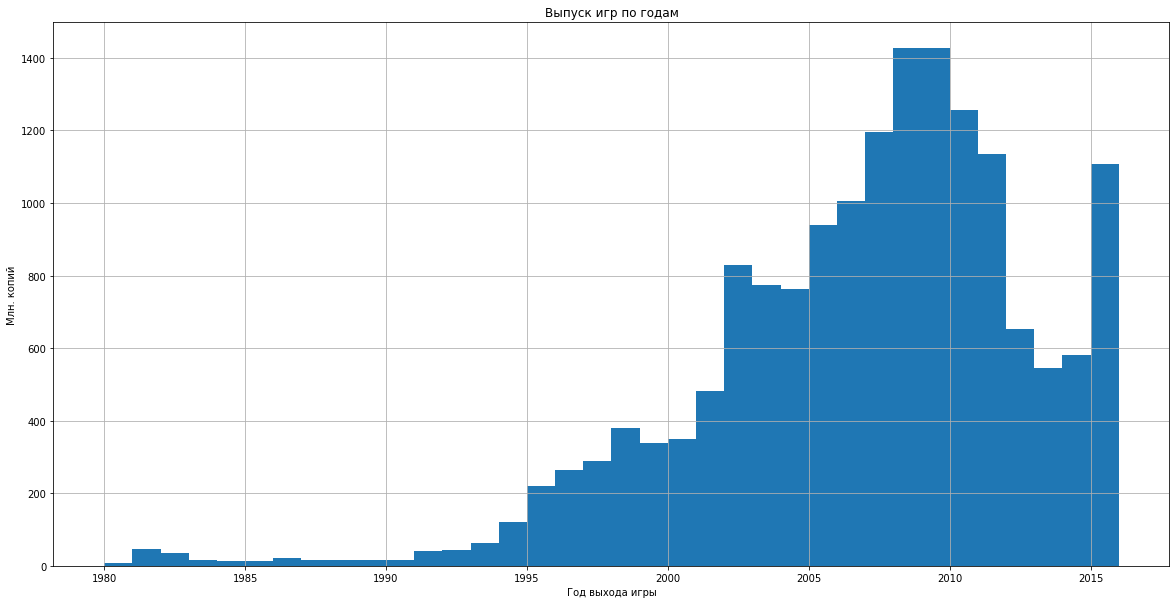

In [26]:
data['year_of_release'].hist(grid=True, figsize=(20, 10), bins=x_bins) #строю гистраграмму
plt.ylabel('Млн. копий')
plt.xlabel('Год выхода игры')
plt.title('Выпуск игр по годам');

Устойчивый рост выпусков игр наблюдаю с 1994 года.<br><br>
Предварительно, для рассмотрения важны данные с 2006 года по следующим причинам:
1. В этом году количество выпусков впервые превысило 1000 штук;
2. Данные, старше 10 лет могут быть не актуальны для прогноза.

<a id='step32'></a>
### 3.2 Как менялись продажи по платформам. Платформы с наибольшими суммарными продажами. Характерный срок, за который появляются новые и исчезают старые платформы

In [27]:
print(data.groupby('platform')['total_sales'].sum().sort_values(ascending=False))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


Вывожу информацию по суммарным продажам игр за все периоды, определяю топовые платформы.

In [28]:
top_platforms = pd.Series(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'])

Создаю массив с данными о 10 топовых платформах по продажам.

Продажи игр на платформе PS2


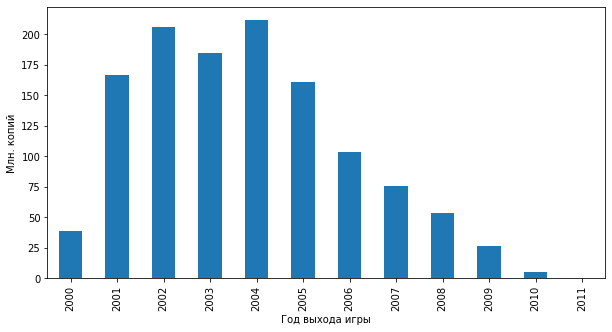

Продажи игр на платформе X360


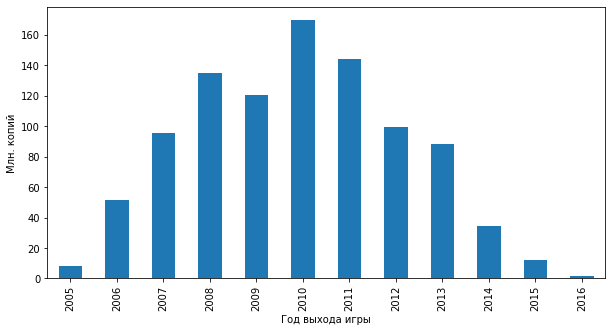

Продажи игр на платформе PS3


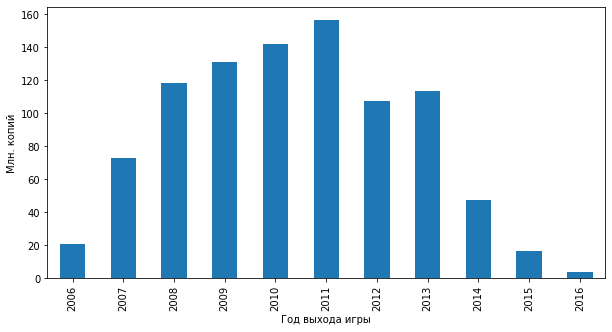

Продажи игр на платформе Wii


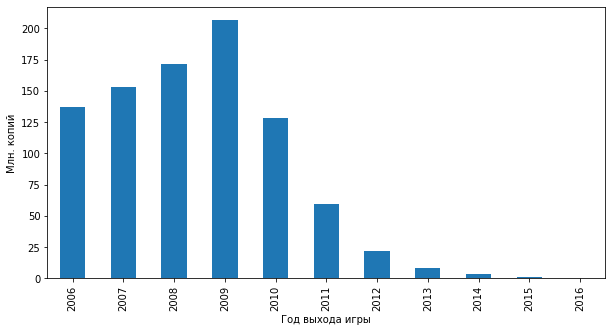

Продажи игр на платформе DS


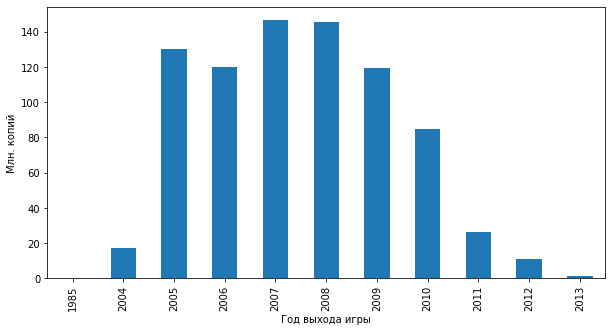

Продажи игр на платформе PS


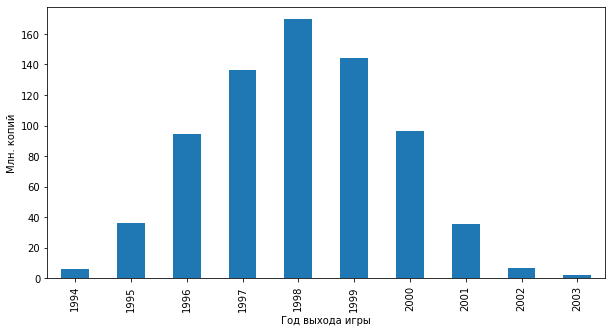

Продажи игр на платформе PS4


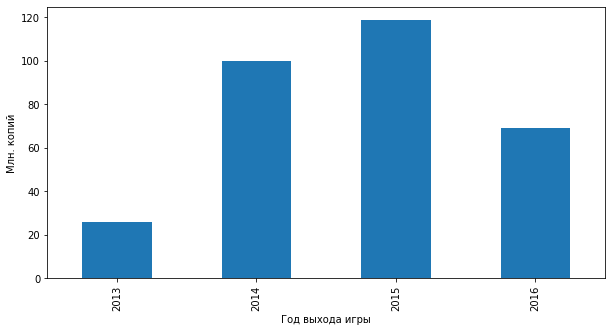

Продажи игр на платформе GBA


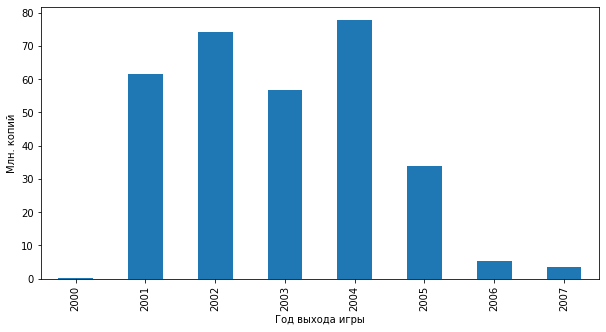

Продажи игр на платформе PSP


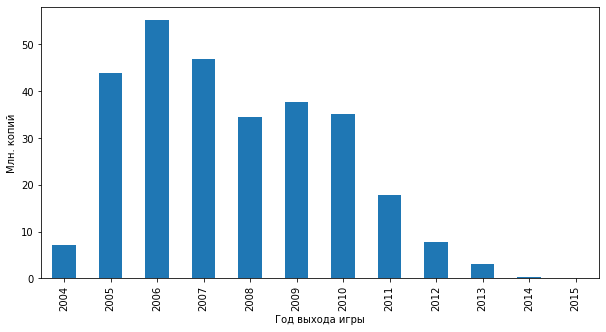

Продажи игр на платформе 3DS


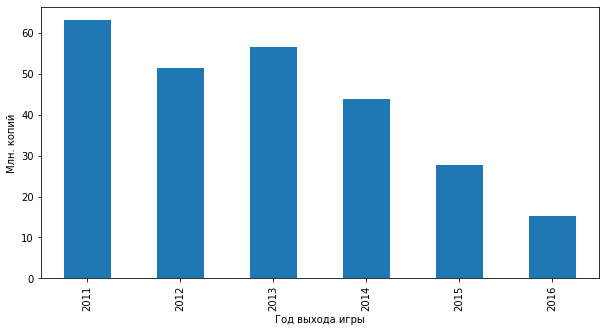

In [29]:
for platform_name in top_platforms: #строю графики для всех платформ, входящих в массив
    print('Продажи игр на платформе', platform_name)
    data.query('platform == @platform_name').groupby('year_of_release')['total_sales'].sum().plot(
        figsize=(10, 5), kind='bar')
    plt.ylabel('Млн. копий')
    plt.xlabel('Год выхода игры')
    plt.show()
    

По графикам на основе анализа топовых платформ делаю вывод, что средний срок существования платформы 8-12 лет.<br>
При этом существует характерный рост доходов от платформы, пик и снижение.

<a id='step33'></a>
### 3.3 Актуальный период данных

In [30]:
pd.set_option('display.max_columns', 100) 
#строю таблицу с суммарным доходам по годам/платформам не старше 12 лет
display(data.query(
    'year_of_release > 2004').pivot_table(index='year_of_release',
    columns='platform', values='total_sales', aggfunc='sum'))

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2005,NaN,NaN,130.14,33.86,27.62,4.37,160.66,NaN,NaN,43.84,NaN,NaN,NaN,8.25,49.08,NaN
2006,NaN,NaN,119.81,5.28,11.26,2.85,103.42,20.96,NaN,55.32,NaN,137.15,NaN,51.62,10.04,NaN
2007,NaN,0.02,146.94,3.40,0.27,9.28,75.99,73.19,NaN,46.93,NaN,152.77,NaN,95.41,0.55,NaN
2008,NaN,0.04,145.31,NaN,NaN,12.42,53.90,118.52,NaN,34.55,NaN,171.32,NaN,135.26,0.18,NaN
2009,NaN,NaN,119.54,NaN,NaN,16.91,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,85.02,NaN,NaN,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN
2011,63.20,NaN,26.18,NaN,NaN,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN,NaN
2012,51.36,NaN,11.01,NaN,NaN,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN,NaN
2013,56.57,NaN,1.54,NaN,NaN,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,NaN,18.96


Согласно таблице в 2016 происходили продажи игр на платформах: <strong>3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne.</strong> Т.е. остальные платформы утратили свою актуальность.<br>
При этом большая часть из актуальных платформ находится в стадии спада продаж и, очевидно, они устарели и в 2017 году будут слабо актуальны.<br>
Актуальные платформы:
<table>
    <table align="left">
	<tbody>
		<tr>
			<td>Платформа</td>
			<td>Год старта</td>
			<td>Возраст</td>
		</tr>
		<tr>
			<td>PS4</td>
			<td>2013</td>
			<td>4 года</td>
		</tr>
		<tr>
			<td>PSV</td>
			<td>2011</td>
			<td>6 лет</td>
		</tr>
		<tr>
			<td>WiiU</td>
			<td>2012</td>
			<td>5 лет</td>
		</tr>
		<tr>
			<td>X-one</td>
			<td>2013</td>
			<td>4 года</td>
		</tr>
	</tbody>
</table>
<br><br><br><br><br><br><br><br>

PC в расчёт не принимаю, потому что платформа старая, отличная от игровых консолей и далее будет актуальна.<br><br>
Исходя из того, что возраст актуальных платформ 4-6 лет, рынок игр быстро развивается и меняется, а за 2016 года данные могут быть неполными, считаю, что за актуальный период следует принять данные c 2012 года (5 лет)

In [31]:
data = data.query('year_of_release > 2011')

Изменяю исходный датафрейм.

<a id='step34'></a>
### Какие платформы лидируют по продажам, растут или падают?

Для лучшего понимания из внешнего источника получаю расшифровку название платформ:<br>
http://old.igromania.ru/platforms/<br><br>
Отмечаю следующие особенности:
1. PS4 заменяет PS3 (игровая приставка, Sony);
2. XOne заменяет X360 (игровая приставка, Microsoft);
3. WiiU заменяет Wii (игровая приставка, Nintendo);
4. PSV заменяет PSP (карманная приставка, Sony);
5. 3DS заменяет DS (карманная приставка, Nintendo);
6. PC - персональные компьютеры.

In [32]:
print(data.groupby('platform')['total_sales'].sum().sort_values(ascending=False))

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64


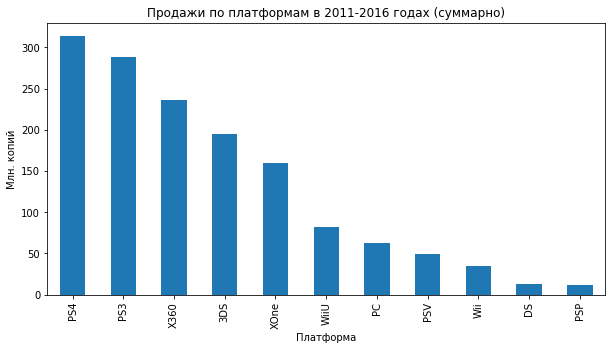

In [33]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(
        figsize=(10, 5), kind='bar')
plt.ylabel('Млн. копий')
plt.xlabel('Платформа')
plt.title('Продажи по платформам в 2011-2016 годах (суммарно)');

По продажам за 5 лет лидируют: PS3, X360, PS4, 3DS, XOne.<br>
Однако ряд этих платформ уже устарёл.

In [34]:
print(data.query('year_of_release == 2015').groupby('platform')['total_sales'].sum().sort_values(ascending=False))

platform
PS4     118.90
XOne     60.14
3DS      27.78
PS3      16.82
WiiU     16.35
X360     11.96
PC        8.52
PSV       6.25
Wii       1.14
PSP       0.12
Name: total_sales, dtype: float64


In [35]:
print(data.query('year_of_release == 2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False))

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64


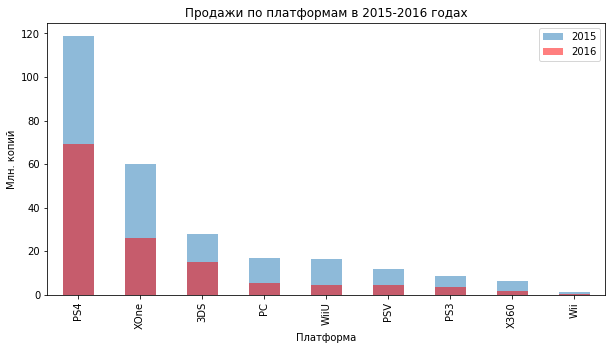

In [36]:
fig, ax = plt.subplots()

ax = data.query(
    'year_of_release == 2015').groupby(
    'platform')['total_sales'].sum().sort_values(ascending=False).plot(
        figsize=(10, 5), kind='bar', alpha=0.5)
data.query(
    'year_of_release == 2016').groupby(
    'platform')['total_sales'].sum().sort_values(ascending=False).plot(
        figsize=(10, 5), kind='bar', ax=ax, alpha=0.5, color='r')
plt.ylabel('Млн. копий')
plt.xlabel('Платформа')
plt.legend(["2015", "2016"])
plt.title('Продажи по платформам в 2015-2016 годах');


В 2015 и 2016 годах лидировали PS4, XOne, 3DS.

In [37]:
display(data.pivot_table(index='year_of_release',
    columns='platform', values='total_sales', aggfunc='sum'))

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Такие платформы, как DS и PSP вообще не продавались в 2016 году, а также имеют продолжения от производителя (3DS и PSV). Принимаю решение также исключить их из исследования.

In [38]:
data = data.query('platform != "DS" & platform != "PSP"')

Исключаю из датафрейма платформы DS и PSP как неактуальные.

In [39]:
actual_platforms = data['platform'].unique() #создаю массив с именами платформ

Продажи игр на платформе PS3


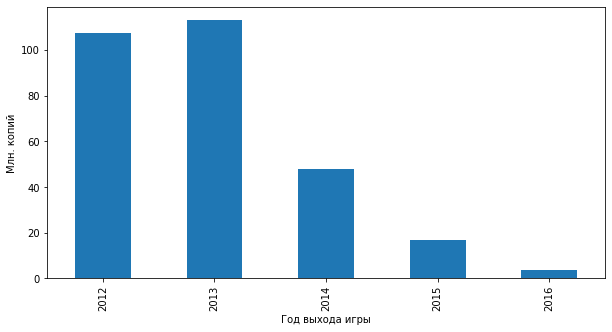

Продажи игр на платформе X360


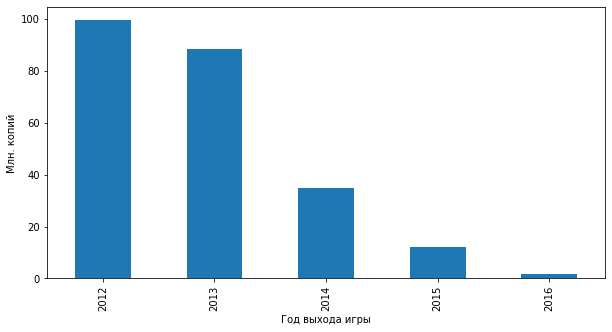

Продажи игр на платформе PS4


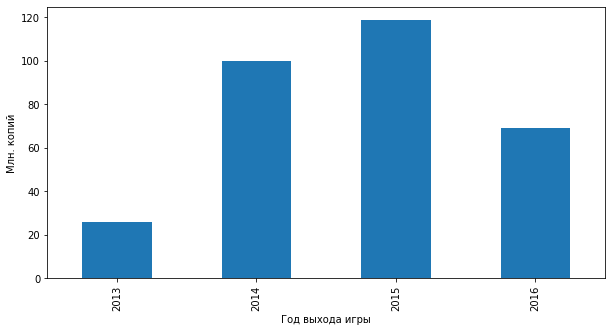

Продажи игр на платформе 3DS


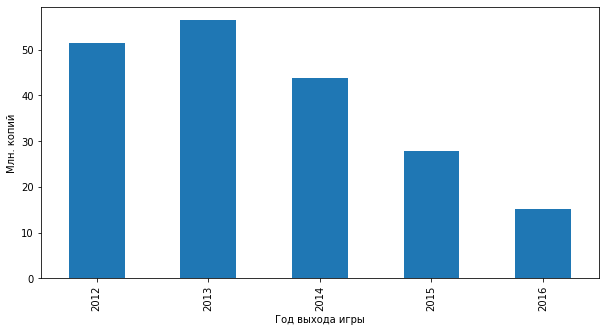

Продажи игр на платформе XOne


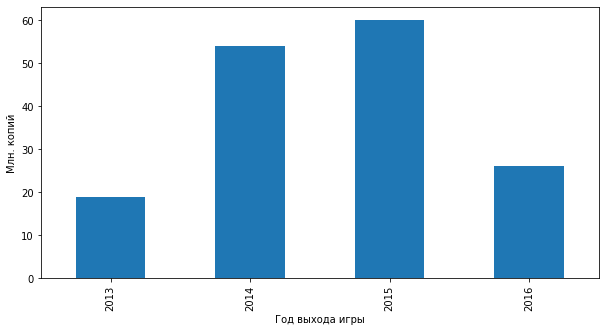

Продажи игр на платформе WiiU


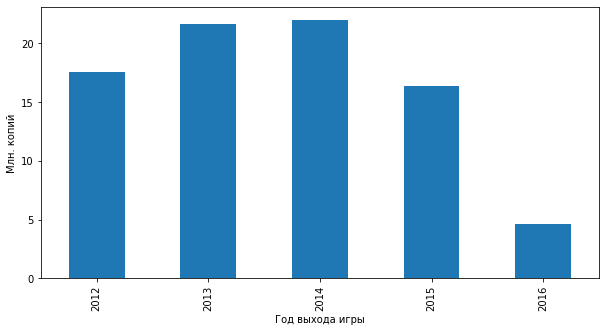

Продажи игр на платформе Wii


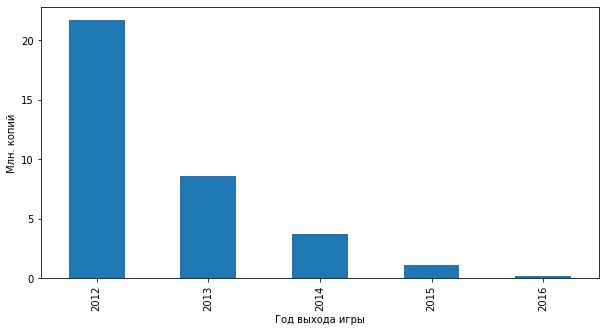

Продажи игр на платформе PC


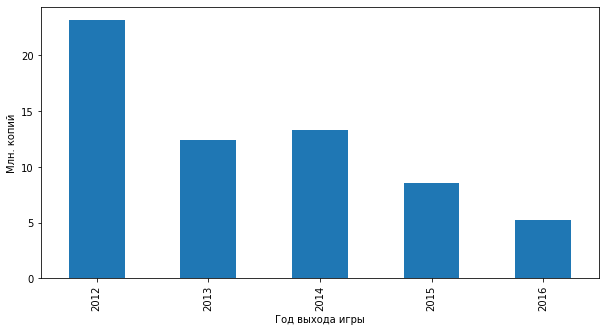

Продажи игр на платформе PSV


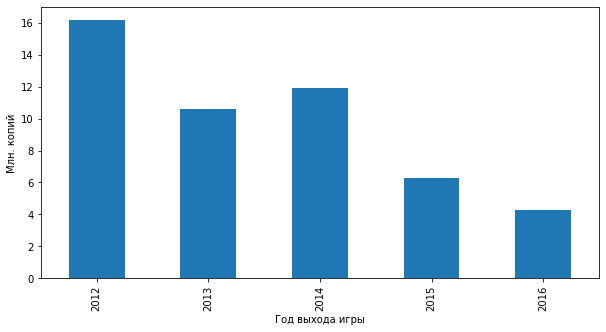

In [40]:
for platform_name in actual_platforms: #строю графики для всех платформ, входящих в массив
    print('Продажи игр на платформе', platform_name)
    data.query('platform == @platform_name').groupby(
        'year_of_release')['total_sales'].sum().plot(figsize=(10, 5), kind='bar')
    plt.ylabel('Млн. копий')
    plt.xlabel('Год выхода игры')
    plt.show()

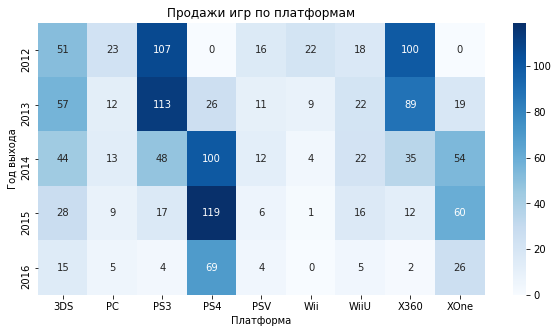

In [41]:
#дополнительно строю "тепловой график"
plt.figure(figsize=(10,5))
sns.heatmap(data.pivot_table(index='year_of_release',
    columns='platform', values='total_sales', aggfunc='sum').fillna(0), annot=True,
           fmt=".0f", cmap="Blues")
plt.ylabel('Год выхода')
plt.xlabel('Платформа')
plt.title('Продажи игр по платформам')
plt.show()

Данные за 2016 год могут быть не полными.<br>
Соответственно растущими платформами и я считаю те, которые в 2015 году росли относительно 2013 и 2014.<br><br>
Платформы, продажи которых однозначно падают: PS3, X360, Wii, т.к. имеют замены.<br>
Платформы, продажи которых однозначно растут: <strong>PS4, XOne</strong>.<br>
Они же являтся потенциально прибыльными, т.к. они молодые (4 года) и могли ещё не достигуть пиков по продажам<br><br>

По платформе WiiU нельзя сделать однозначного вывода, в целом тренд на падение, но она не являются старой (6 лет) и также может ещё удерживать долю рынка или продаваться со слабым падением показателей.<br><br>
3DS и PSV падают, но могу трактовать это как падение рынка карманных приставок в целом.<br><br>
PC также падает, но особенность платформы в том, что она не может устареть и исчезнуть в ближайшее время, формат игр на персональном компьютере будет актуален.


					

<a id='step35'></a>
### 3.5 График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Диаграмма размаха для платформы PS3


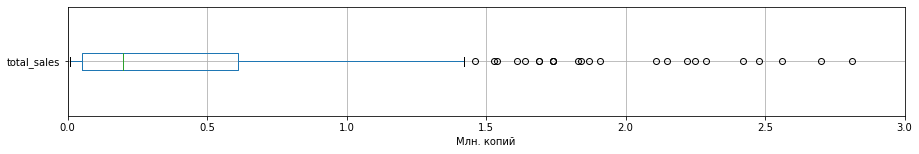

Диаграмма размаха для платформы X360


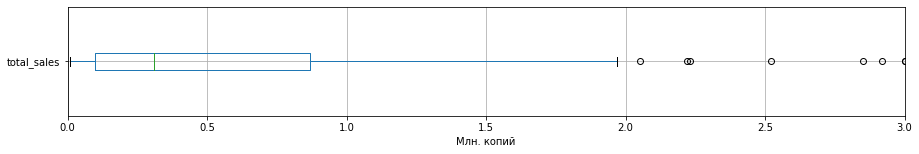

Диаграмма размаха для платформы PS4


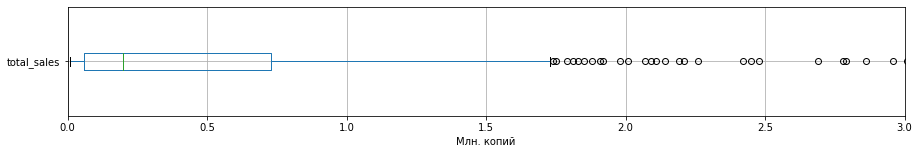

Диаграмма размаха для платформы 3DS


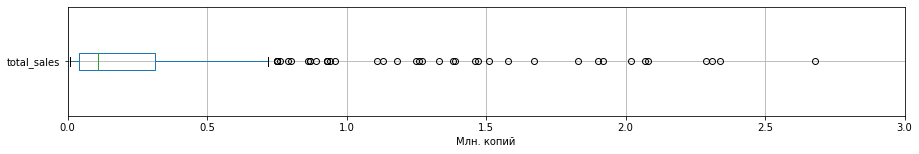

Диаграмма размаха для платформы XOne


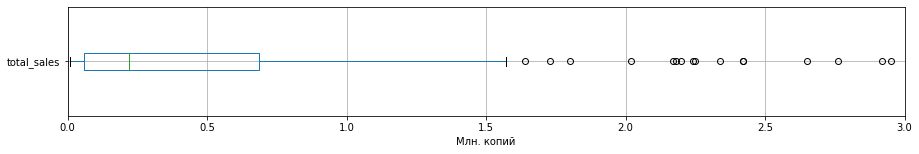

Диаграмма размаха для платформы WiiU


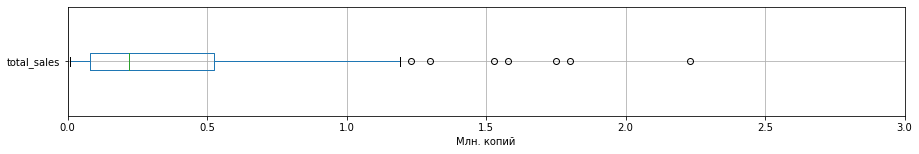

Диаграмма размаха для платформы Wii


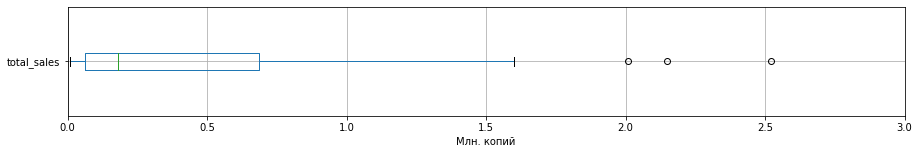

Диаграмма размаха для платформы PC


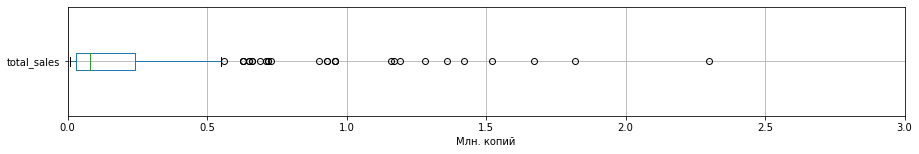

Диаграмма размаха для платформы PSV


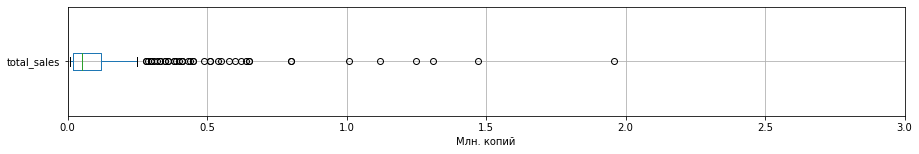

In [42]:
for platform_name in actual_platforms: #строю диаграммы размаха для всех платформ, входящих в массив
    print('Диаграмма размаха для платформы', platform_name)
    data.query('platform == @platform_name').boxplot(column='total_sales', vert=False, figsize=(15, 2))
    plt.xlim(0, 3)
    plt.xlabel('Млн. копий')
    plt.show()

Границы нормального размаха для глобальных продаж для платформ:<br>

X360 - до 1.9;<br>
<strong>PS4, XOne, Wii</strong> - до 1.7;<br>
PS3, WiiU - до 1,4;<br>
PC, 3DS - до 0.7;<br>
PSV - до 0.25.<br>

Распределения продаж для потенциально прибыльных платформ PS4 и XOne схожи, в среднем они составляют до 1.7 млн копий.<br>
X360, Wii, PS3 - являются устаревающими платформами, высокие средние значения обусловленны популярностью на пике развития<br>
Карманные приставки 3DS и PSV ожидаемо имеют низкие показатели средних значений.


Диаграмма размаха для платформы PS3


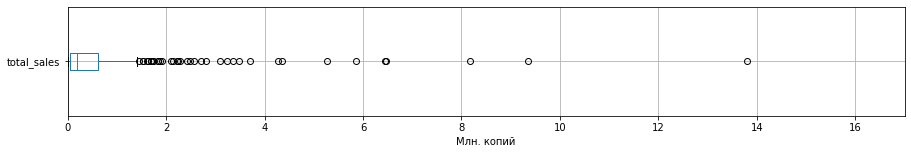

Диаграмма размаха для платформы X360


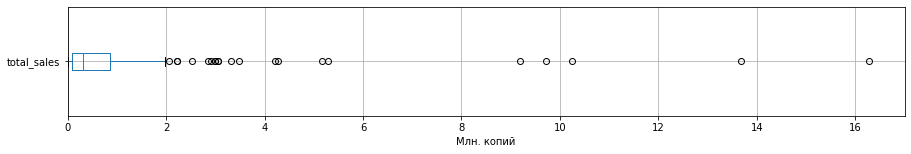

Диаграмма размаха для платформы PS4


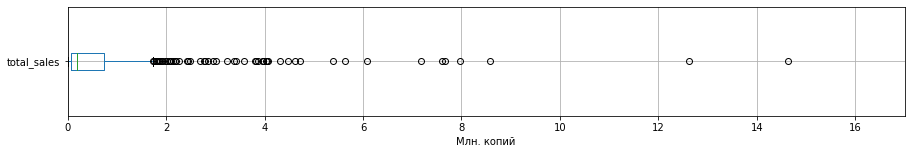

Диаграмма размаха для платформы 3DS


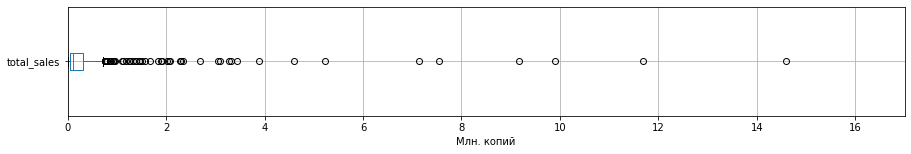

Диаграмма размаха для платформы XOne


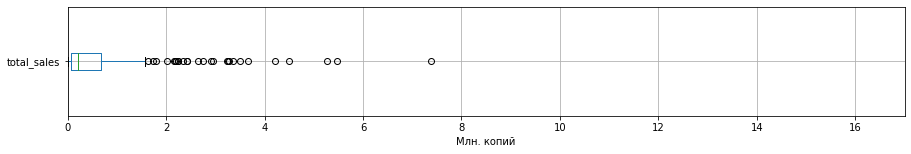

Диаграмма размаха для платформы WiiU


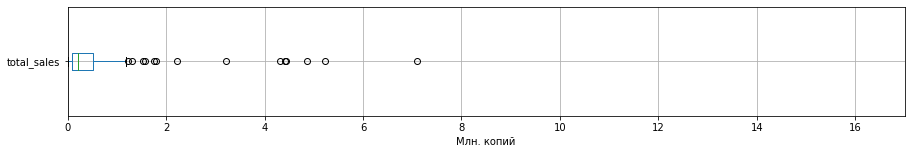

Диаграмма размаха для платформы Wii


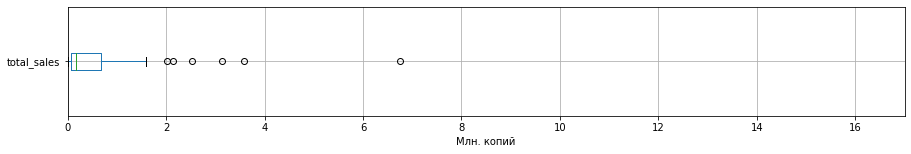

Диаграмма размаха для платформы PC


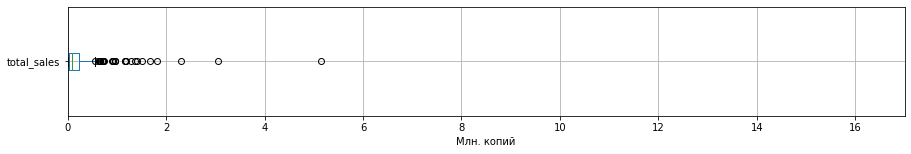

Диаграмма размаха для платформы PSV


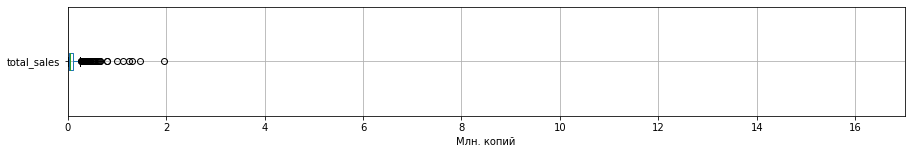

In [43]:
for platform_name in actual_platforms: #строю диаграммы размаха для всех платформ, входящих в массив
    print('Диаграмма размаха для платформы', platform_name)
    data.query('platform == @platform_name').boxplot(column='total_sales', vert=False, figsize=(15, 2))
    plt.xlim(0, 17)
    plt.xlabel('Млн. копий')
    plt.show()

Также на диаграммах имеются выбросы.<br>
На платформах PS3, PS4, X360, 3DS существовали такие игры, которые продавались более чем 12 млн. копий. Такие выбросы характерны для игр - хитов продаж.<br>
Примечательно, что для развивающейся платформы XOne лимит таких выбросов равен 7 млн. копий. Это может объяснятся более поздним переходом пользователей с платформы X360 на платформу XOne<br>
В таком контексте PS4 выглядит более перспективной, по отношению к XOne.

<a id='step36'></a>
### 3.6 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Диаграмма рассеяния и корреляция между отзывами и продажами. Выводы

In [44]:
data_PS4_cor = data.query(
    'platform == "PS4" & user_score < 100 & critic_score > 1').loc[:, [ #отсеиваю данные, которыми я заменял пропуски
    'total_sales', 'user_score', 'critic_score']] #оставляю только необходимые таблицы

Формирую датафрейм с данными об оценках пользователей и критиков для платформы PS4.

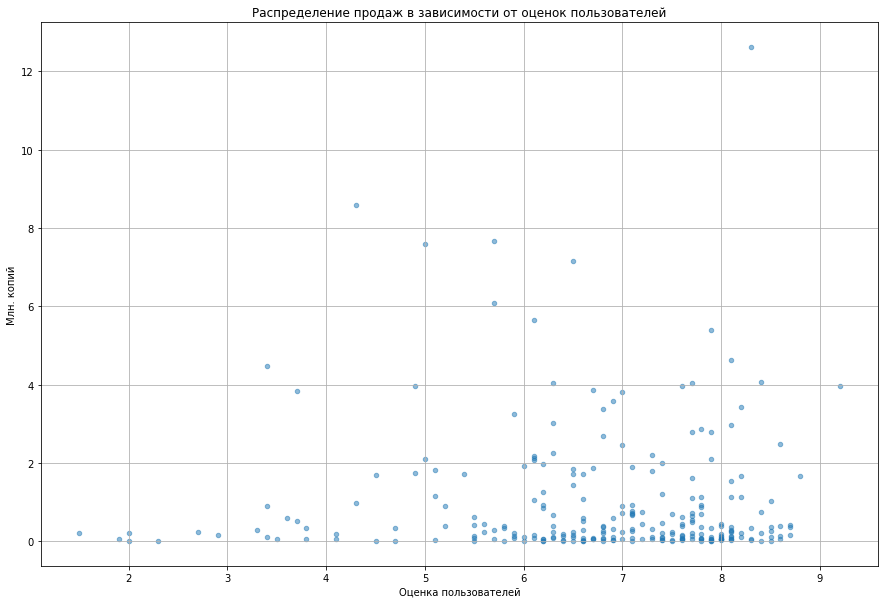

In [45]:
data_PS4_cor.plot(
    x='user_score',
    title='Распределение продаж в зависимости от оценок пользователей',
    y='total_sales', kind='scatter', grid=True, figsize=(15, 10), alpha=0.5)
plt.ylabel('Млн. копий')
plt.xlabel('Оценка пользователей');

Не наблюдаю яркой зависимости продаж от оценок пользователей.<br>
Основная масса точек находится в зоне от 5.5 до 8.5 баллов с продажами до 1 млн копий.<br>
Примечательно, что на диаграмме есть выбросы, когда хиты продаж имеют достаточно низкую оценку пользователей.<br>
Так, самая продаваемая игра имела оценку 8.3 балла, а остальные игры из топ-5 по продажам оценки от 4.3 до 6.5.

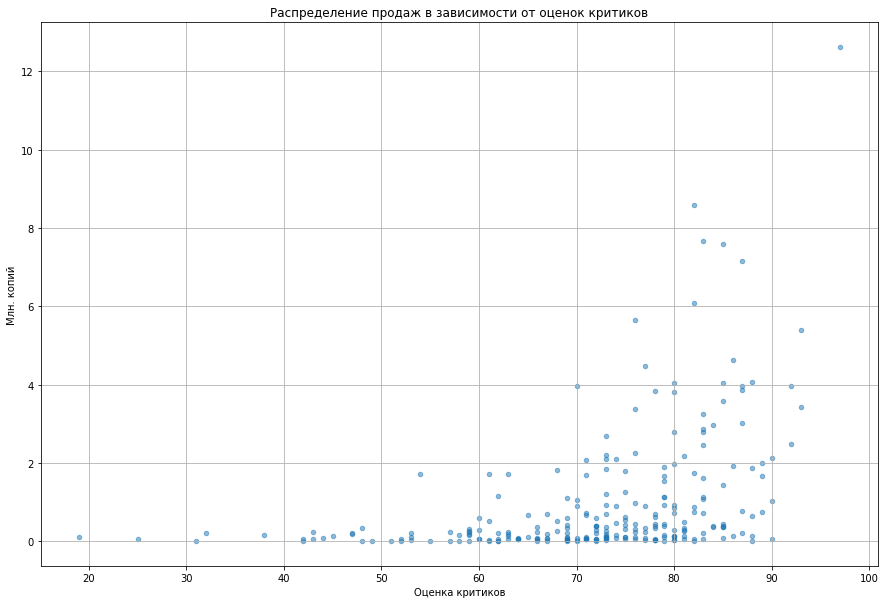

In [46]:
data_PS4_cor.plot(
    x='critic_score',
    title='Распределение продаж в зависимости от оценок критиков',
    y='total_sales', kind='scatter', grid=True, figsize=(15, 10), alpha=0.5)
plt.ylabel('Млн. копий')
plt.xlabel('Оценка критиков');

Зависимость продаж от от оценок критиков более выраженная.<br>
Так игры, продающиеся тиражом более 2 млн экземпляров имеют рейтинг 70 и более.<br>
Основная масса точек находится в зоне от 55 до 85 баллов с продажами до 1.5 млн копий<br>
Топовая игра по продажам имеет рейтинг 97 баллов, а играм из топ-5 присвоены оценки более 80 баллов.

In [47]:
print(data_PS4_cor.corr())

              total_sales  user_score  critic_score
total_sales      1.000000   -0.033625      0.405895
user_score      -0.033625    1.000000      0.557654
critic_score     0.405895    0.557654      1.000000


Для определения зависимости продаж от рейтингов применяю коэффициент Пирсона, который показывает, как изменение одной величины (рейтинга) влияет на изменнение другой (продаж).<br>
Коэффициент Пирсона выбираю т.к. исследуемые данные выглядят как нормально распределенные, количество переменных одинаково.<br><br>
Данное исследование подтверждает выводы по графикам.<br>
Между оценками пользователей и продажами зависимости нет, между оценками критиков есть, но достаточно слабая (коэффициент 0.40)

<a id='step37'></a>
### 3.7 Выводы с продажами игр на других платформах

In [48]:
for platform_name in actual_platforms: #строю диаграммы размаха для всех платформ, входящих в массив
    print('\n\n Корреляция данных для платформы', platform_name)
    print(data.query('platform == @platform_name & user_score < 100 & critic_score > 1').loc[:, [ #отсеиваю данные, которыми я заменял пропуски
    'total_sales', 'user_score', 'critic_score']].corr())



 Корреляция данных для платформы PS3
              total_sales  user_score  critic_score
total_sales      1.000000    0.003227      0.331057
user_score       0.003227    1.000000      0.539456
critic_score     0.331057    0.539456      1.000000


 Корреляция данных для платформы X360
              total_sales  user_score  critic_score
total_sales      1.000000   -0.002014      0.360573
user_score      -0.002014    1.000000      0.557352
critic_score     0.360573    0.557352      1.000000


 Корреляция данных для платформы PS4
              total_sales  user_score  critic_score
total_sales      1.000000   -0.033625      0.405895
user_score      -0.033625    1.000000      0.557654
critic_score     0.405895    0.557654      1.000000


 Корреляция данных для платформы 3DS
              total_sales  user_score  critic_score
total_sales      1.000000    0.201813      0.310553
user_score       0.201813    1.000000      0.722762
critic_score     0.310553    0.722762      1.000000


 Корреляц

Аналогично для других платформ применяю коэффициент Пирсона.
<br><br>
На продажи игр влияют:
1. Рейтинги критиков, слабо, для платформ: PS4, XOne, PS3, X360, Wii;
2. Ретинги критиков и пользоваталей, очень слабо: WiiU, 3DS, PC;
3. На продажи платформы PSV не влияют никакие оценки.

<a id='step38'></a>
### 3.8 Общее распределение игр по жанрам. Самые прибыльные жанры

In [49]:
genre_data_count = data.groupby('genre')['total_sales'].count().sort_values(ascending=False).reset_index()
#считаю количество игр по жанрам

In [50]:
genre_data_sum = data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).astype(int).reset_index()
#считаю продажи игр по жанрам
print(genre_data_sum)

           genre  total_sales
0         Action          435
1        Shooter          304
2   Role-Playing          180
3         Sports          179
4           Misc           84
5       Platform           60
6         Racing           53
7       Fighting           44
8     Simulation           34
9      Adventure           27
10      Strategy           12
11        Puzzle            4


Выделяются жанры с высокими продажами: Action, Shooter.<br>
Выделяются жанры с низкими продажами: Strategy, Puzzle.

In [51]:
genre_data = genre_data_count.merge(genre_data_sum, on='genre', how='left') #объединяю данные
genre_data.rename(columns={'total_sales_x': 'quantity', 'total_sales_y': 'sales'}, inplace=True) #переименовываю колонки

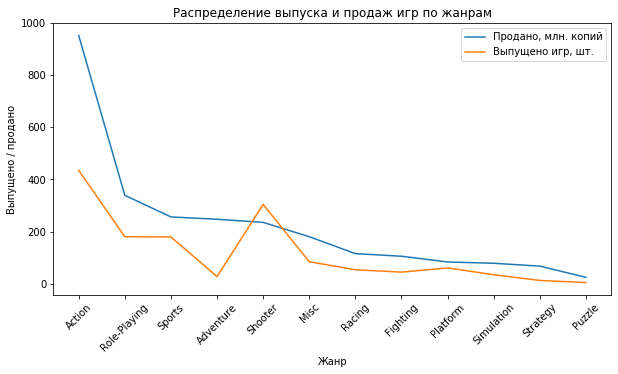

In [52]:
genre_data.plot(figsize=(10, 5))
names = genre_data['genre']
 
plt.xticks(np.arange(len(names)), names, rotation = 45)
plt.title('Распределение выпуска и продаж игр по жанрам')
plt.ylabel('Выпущено / продано')
plt.xlabel('Жанр')
plt.legend(["Продано, млн. копий", "Выпущено игр, шт."]);

In [53]:
genre_data['Ratio'] = genre_data['sales']/genre_data['quantity']
#рассчитываю соотношение проданных игр к выпущенным
print(genre_data)

           genre  quantity  sales     Ratio
0         Action       953    435  0.456453
1   Role-Playing       339    180  0.530973
2         Sports       256    179  0.699219
3      Adventure       247     27  0.109312
4        Shooter       235    304  1.293617
5           Misc       180     84  0.466667
6         Racing       115     53  0.460870
7       Fighting       105     44  0.419048
8       Platform        83     60  0.722892
9     Simulation        78     34  0.435897
10      Strategy        67     12  0.179104
11        Puzzle        24      4  0.166667


Выявляю закономерность, согласно которой чем больше выпущено разлчиных игр определённого жанра, тем выше суммарные продажи в этом жанре. <br>
Однако данная закономерность не распространяется на жанр Shooter, который, находясь на 4м месте по количеству выпущенных игр, занимает 2е место по суммарным продажам, что является успешным кейсом и в этом жанре есть хиты, формирующие высокое соотношение проданных игр к выпущенным. Аналогично обращаю внимание на результат жанра Sports, в котором показатель такого соотношения также высок.<br>
При этом жанр Action является безусловным лидером как по количеству выпущенных игр, так и по продажам.

<a id='conclusion3'></a>
### Вывод 3

С 1994 года наблюдается рост выпусков игр, в 2006 году впервые количество релизов превышает 1000 штук.<br>
Срок существования платформ из ТОП-10 по продажам - 8-12 лет.<br>
Платформы, актуальные (по которым были продажи) в 2016 году: 3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne.<br><br>
Для анализа данных актуальным периодом были приняты данные с 2012 года.<br><br>
В актуальном периоде за 5 лет лидируют по продажам платформы:  PS4, PS3, X360, 3DS, XOne.<br>
В 2015 и 2016 годах лидируют по продажам платформы:  PS4, XOne, 3DS.
<br><br>
Растущие, молодые и потенциально прибыльные платформы: PS4 и XOne.<br>
Платформы, которые ожидаемо будут падать ещё глубже в следующем году, т.к. имеют замены: PS3, X360, Wii.<br>
Платформы PC, карманных приставок 3DS и PSV также падают, однако в любом случае останутся актуальными на следующий год.<br><br>
Границы нормального размаха продаж для платформ PS4 и XOne схожи, в среднем они составляют до 1.7 млн копий, однако на PS4 выбросы до 12 млн копий против 7 млн у XOne, что говорит о большей успешности хитовых игр на платформе PS4.<br>
<br>
<br>
На продажи игр влияют:
1. Рейтинги критиков, слабо, для платформ: PS4, XOne, PS3, X360, Wii;
2. Ретинги критиков и пользоваталей, очень слабо: WiiU, 3DS, PC;
3. На продажи платформы PSV не влияют никакие рейтинги.
<br>
<br>

Жанры с высокими продажами: Action, Shooter.<br>
Жанры с низкими продажами: Strategy, Puzzle.<br>
Жанр Action - лидер по количеству игр.<br>
Жанры Shooter и Sport имеют самые высокие показатели проданных игр к выпущенным.<br>

<a id='step4'></a>
## Шаг 4. Портрет пользователя каждого региона
<a href='#step41'>4.1 Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP). Различия в долях продаж</a><br><br>
<a href='#step42'>4.2 Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)</a><br><br>
<a href='#step43'>4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе для пользователя каждого региона (NA, EU, JP)?</a><br><br>
<a href='#conclusion4'>Вывод 4</a><br>


<a id='step41'></a>
### 4.1 Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP). Различия в долях продаж

In [54]:
na_platforms = data.query('na_sales > 0').groupby(
    'platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
#формирую датафрейм с данными о продажах по платформам в N/A регионе
na_platforms = na_platforms.loc[:4] #оставляю топ-5
na_platforms_sum = na_platforms['na_sales'].sum()
na_platforms['%'] = (na_platforms['na_sales']/na_platforms_sum)
na_platforms['%'] = na_platforms['%'].apply('{:.0%}'.format) #добавляю столбец с долями

In [55]:
eu_platforms = data.query('eu_sales > 0').groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_platforms = eu_platforms.loc[:4]
eu_platforms_sum = eu_platforms['eu_sales'].sum()
eu_platforms['%'] = (eu_platforms['eu_sales']/eu_platforms_sum)
eu_platforms['%'] = eu_platforms['%'].apply('{:.0%}'.format) 

In [56]:
jp_platforms = data.query('jp_sales > 0').groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_platforms = jp_platforms.loc[:4]
jp_platforms_sum = jp_platforms['jp_sales'].sum()
jp_platforms['%'] = (jp_platforms['jp_sales']/jp_platforms_sum)
jp_platforms['%'] = jp_platforms['%'].apply('{:.0%}'.format) 

In [57]:
general_platforms = na_platforms.merge(eu_platforms, on='platform', how='outer')
general_platforms = general_platforms.merge(jp_platforms, on='platform', how='outer').fillna(0)
general_platforms.rename(columns={'%_x': '%', '%_y': '%'}, inplace=True)

Топ-5 платформ по регионам


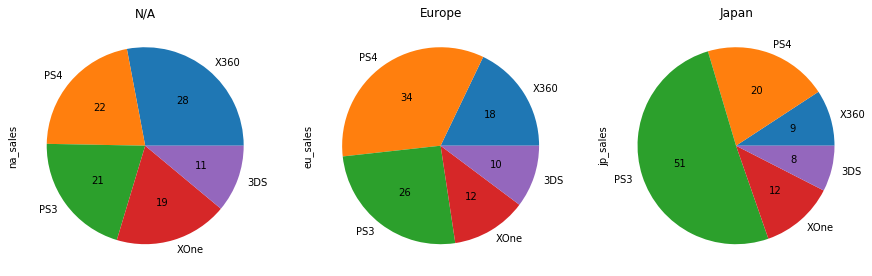

In [58]:
print('Топ-5 платформ по регионам')
fig, axes = plt.subplots(1,3, figsize = (15,10))
general_platforms.query(
    'na_sales > 0').plot(
    kind='pie', labels=general_platforms.platform, y='na_sales', legend=False, title='N/A', autopct='%.0f', ax = axes[0])
general_platforms.query(
    'eu_sales > 0').plot(
    kind='pie', labels=general_platforms.platform, y='eu_sales', legend=False, title='Europe', autopct='%.0f', ax = axes[1])
general_platforms.query(
    'jp_sales > 0').plot(
    kind='pie', labels=general_platforms.platform, y='jp_sales', legend=False, title='Japan', autopct='%.0f', ax = axes[2])

Визуализирую данные. Регионы отличаются по трендам, но для более точного анализа строю дополнительную таблицу.

In [59]:
display(general_platforms)

,platform,na_sales,%,eu_sales,%,jp_sales,%
0,X360,140.05,28%,74.52,18%,0.00,0
1,PS4,108.74,22%,141.09,34%,15.96,9%
2,PS3,103.38,21%,106.86,26%,35.29,20%
3,XOne,93.12,19%,51.59,12%,0.00,0
4,3DS,55.31,11%,42.64,10%,87.79,51%
5,PSV,0.00,0,0.00,0,21.04,12%
6,WiiU,0.00,0,0.00,0,13.01,8%


В каждом регионе ТОП-5 отличается.<br><br>
Так в Европе самая продаваемая платформа: PS4, далее PS3, X360 и XOne.
Это означает, что в будущем году продажи PS4 будут увеличиваться. Из карманных платформ в топ-5 входит 3DS.<br><br>
В Японии почти всю долю рынка занимают карманные платформы: 3DS и PSV, в консолях лидирует PS3 (вероятен переход на PS4), а платформы XOne и X360 не продаются вообще.<br><br>
В Северной Америке - ситуация аналогична Европейским, с разницей в том, что совокупные доли XOne и X360 примерно равны совокупным долям PS3 и PS4, в качестве карманной платформы из топ-5 также выступает 3DS.
    

<a id='step42'></a>
### 4.2 Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

In [60]:
na_genres = data.query('na_sales > 0').groupby(
    'genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
#формирую датафрейм с данными о продажах по жанрам в N/A регионе
na_genres = na_genres.loc[:4] #оставляю топ-5
na_genres_sum = na_genres['na_sales'].sum()
na_genres['%'] = (na_genres['na_sales']/na_genres_sum)
na_genres['%'] = na_genres['%'].apply('{:.0%}'.format) #добавляю столбец с долями

In [61]:
eu_genres = data.query('eu_sales > 0').groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_genres = eu_genres.loc[:4]
eu_genres_sum = eu_genres['eu_sales'].sum()
eu_genres['%'] = (eu_genres['eu_sales']/eu_platforms_sum)
eu_genres['%'] = eu_genres['%'].apply('{:.0%}'.format) 

In [62]:
jp_genres = data.query('jp_sales > 0').groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_genres = jp_genres.loc[:4]
jp_genres_sum = jp_genres['jp_sales'].sum()
jp_genres['%'] = (jp_genres['jp_sales']/jp_genres_sum)
jp_genres['%'] = jp_genres['%'].apply('{:.0%}'.format) 

In [63]:
general_genres = na_genres.merge(eu_genres, on='genre', how='outer')
general_genres = general_genres.merge(jp_genres, on='genre', how='outer').fillna(0)
general_genres.rename(columns={'%_x': '%', '%_y': '%'}, inplace=True)

Топ-5 жанров по регионам


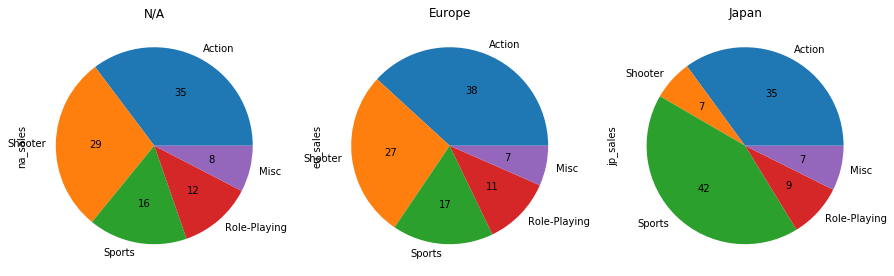

In [64]:
print('Топ-5 жанров по регионам')
fig, axes = plt.subplots(1,3, figsize = (15,10))

general_genres.query(
    'na_sales > 0').plot(
    kind='pie', labels=general_genres.genre, y='na_sales', legend=False, title='N/A', autopct='%.0f', ax = axes[0])
general_genres.query(
    'eu_sales > 0').plot(
    kind='pie', labels=general_genres.genre, y='eu_sales', legend=False, title='Europe', autopct='%.0f', ax = axes[1])
general_genres.query(
    'jp_sales > 0').plot(
    kind='pie', labels=general_genres.genre, y='jp_sales', legend=False, title='Japan', autopct='%.0f', ax = axes[2]);

Визуализирую данные. Регионы отличаются по трендам, но для более точного анализа строю дополнительную таблицу.

In [65]:
display(general_genres)

,genre,na_sales,%,eu_sales,%,jp_sales,%
0,Action,177.00,35%,158.43,38%,49.18,35%
1,Shooter,144.77,29%,113.47,27%,9.23,7%
2,Sports,81.38,16%,68.84,17%,0.00,0
3,Role-Playing,60.65,12%,46.76,11%,59.12,42%
4,Misc,38.13,8%,0.00,0,12.45,9%
5,Racing,0.00,0,27.29,7%,0.00,0
6,Simulation,0.00,0,0.00,0,10.35,7%


Безусловный лидер во Европе и Северной Америке - жанр Action, в Японии - Role-Playing.
В Европе и Северной Америке второй по популярности жанр Shooter, в то время как в Японии Action.
На третьем и четвертом месте в Европе и Северной Америке Sports и Role-Playing.


<a id='step43'></a>
### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе для пользователя каждого региона (NA, EU, JP)?

In [66]:
na_rating = data.query('na_sales > 0').groupby(
    'rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
#формирую датафрейм с данными о продажах по рейтингам в N/A регионе
na_rating_sum = na_rating['na_sales'].sum()
na_rating['%'] = (na_rating['na_sales']/na_rating_sum)
na_rating['%'] = na_rating['%'].apply('{:.0%}'.format) #добавляю столбец с долями

In [67]:
eu_rating = data.query('eu_sales > 0').groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_rating_sum = eu_rating['eu_sales'].sum()
eu_rating['%'] = (eu_rating['eu_sales']/eu_rating_sum)
eu_rating['%'] = eu_rating['%'].apply('{:.0%}'.format) 

print(eu_rating)

  rating  eu_sales    %
0      M    193.96  39%
1      E    111.79  22%
2   UNKN     89.32  18%
3   E10+     54.84  11%
4      T     52.96  11%


In [68]:
jp_rating = data.query('jp_sales > 0').groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_rating_sum = jp_rating['jp_sales'].sum()
jp_rating['%'] = (jp_rating['jp_sales']/jp_rating_sum)
jp_rating['%'] = jp_rating['%'].apply('{:.0%}'.format) 

In [69]:
general_rating = na_rating.merge(eu_rating, on='rating', how='outer')
general_rating = general_rating.merge(jp_rating, on='rating', how='outer').fillna(0)
general_rating.rename(columns={'%_x': '%', '%_y': '%'}, inplace=True)

Топ-5 рейтингов ESRB по регионам


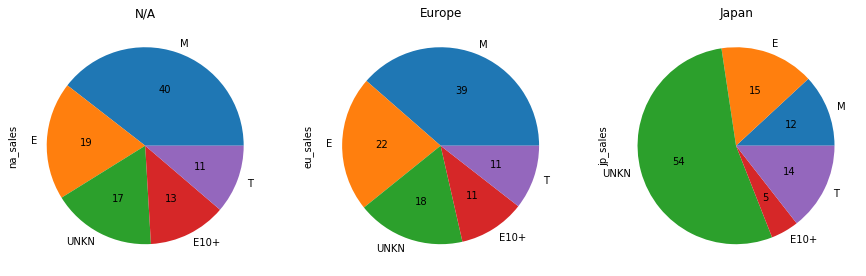

In [70]:
print('Топ-5 рейтингов ESRB по регионам')
fig, axes = plt.subplots(1,3, figsize = (15,10))

general_rating.plot(
    kind='pie', labels=general_rating.rating, y='na_sales', legend=False, title='N/A', autopct='%.0f', ax = axes[0])
general_rating.plot(
    kind='pie', labels=general_rating.rating, y='eu_sales', legend=False, title='Europe', autopct='%.0f', ax = axes[1])
general_rating.plot(
    kind='pie', labels=general_rating.rating, y='jp_sales', legend=False, title='Japan', autopct='%.0f', ax = axes[2]);

Визуализирую данные. Регионы отличаются по трендам, но для более точного анализа строю дополнительную таблицу.

In [71]:
display(general_rating)

,rating,na_sales,%,eu_sales,%,jp_sales,%
0,M,231.57,40%,193.96,39%,21.20,12%
1,E,113.44,19%,111.79,22%,27.62,15%
2,UNKN,100.13,17%,89.32,18%,95.62,54%
3,E10+,75.09,13%,54.84,11%,8.19,5%
4,T,66.02,11%,52.96,11%,25.76,14%


В Европе и N/A абсолютно аналогичная картина: больше всего игр продаётся с рейтингом М, далее E, неизвестныйб E10+ и Т.<br>
В Японии большая часть продаж у игр с неисвестным (не установленным) рейтингом, и почти в равных долях E, M, T (минимально Е10+).

<a id='conclusion4'></a>
### Вывод 4

В каждом регионе есть отличия по продаваемым платформам и жанрам<br><br>
Так в Европе самая продаваемая платформа: PS4, далее PS3, X360 и XOne.
Это означает, что в будущем году продажи PS4 будут увеличиваться. Из карманных платформ в топ-5 входит 3DS.<br>
В Японии почти всю долю рынка занимают карманные платформы: 3DS и PSV, в консолях лидирует PS3 (вероятен переход на PS4), а платформы XOne и X360 не продаются вообще.<br>
В Северной Америке - ситуация аналогична Европейским, с разницей в том, что совокупные доли XOne и X360 примерно равны совокупным долям PS3 и PS4, в качестве карманной платформы из топ-5 также выступает 3DS.
<br><br>
Безусловный лидер во Европе и Северной Америке - жанр Action, в Японии - Role-Playing.
В Европе и Северной Америке второй по популярности жанр Shooter, в то время как в Японии Action.
На третьем и четвертом месте в Европе и Северной Америке Sports и Role-Playing.<br><br>
В Европе и Северной полностью аналогичная картина: больше всего игр продаётся с рейтингом М, далее E, неизвестныйб E10+ и Т.<br>
В Японии большая часть продаж у игр с неисвестным (не установленным) рейтингом, и почти в равных долях E, M, T (минимально Е10+).

<a id='step5'></a>
## Шаг 5. Проверка гипотез
<a href='#step51'>5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a><br><br>
<a href='#step52'>5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные</a><br><br>
<a href='#conclusion5'>Вывод 5</a><br>


<a id='step51'></a>
### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [72]:
user_score_xone = data.query('platform == "XOne" & user_score < 100')['user_score']
user_score_pc = data.query('platform == "PC" & user_score < 100')['user_score']


Формирую массивы с данными.

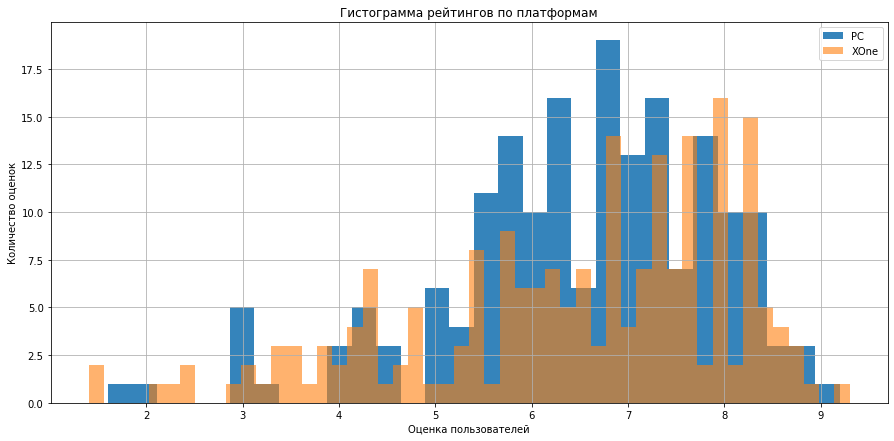

In [73]:
user_score_xone.hist(bins=30, alpha = 0.9)
user_score_pc.hist(bins=50, alpha = 0.6, figsize=(15, 7))
plt.title('Гистограмма рейтингов по платформам')
plt.legend(["PC", "XOne"])
plt.ylabel('Количество оценок')
plt.xlabel('Оценка пользователей');

Диаграмма скошена влево. Выбросы в зонее <4 баллов.

In [74]:
user_score_xone = user_score_xone[user_score_xone>=4]
user_score_pc = user_score_pc[user_score_pc>=4]

Удаляю выбросы.

In [75]:
print('Дисперсия для рейтингов XOne: {:.2f}'.format(np.var(user_score_xone))) #рассчитываю дисперсии
print('Дисперсия для рейтингов PC: {:.2f}'.format(np.var(user_score_pc)))

Дисперсия для рейтингов XOne: 1.30
Дисперсия для рейтингов PC: 1.59


Дисперсии не равны.

Выбор критерия для проверки гипотезы:
1. Тип данных: количественные, непрерывные;
2. Данные ведут себя как при нормальном распределении;
3. Данные из выборок независимы друг от друга (в каждой выборке представлены разные игры);
4. В сравнении участвуют средние показатели из выборки.
<br>

Исходя из этих пунктов выбираю критерий Стьюдента (t-test) 
<br>
Исходя из того, что дисперсии выборок не равны,при расчёте передаю параметр <i>equal_var = False</i>.<br>
Пороговое значение alpha - 5%

Формулирую нулевую гипотезу:<br>
Средние пользовательские рейтинги платформ XOne и PC равны.<br>
Альтернативная гипотеза:<br>
Средние пользовательские рейтинги платформы XOne отличаются от рейтингов платформы PC<br>
<br>
Для проверки гипотез использовал массивы данных с рейтингами, отсортированные по платформе, очищенные от выбросов.<br>

In [76]:
alpha = 0.05 #выбираю значение согласно примеру в теоретической части

results = st.ttest_ind(
    user_score_xone, 
    user_score_pc,
    equal_var = False)#дисперсии разные

print('p-значение:{:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.410
Не получилось отвергнуть нулевую гипотезу


<a id='step52'></a>
### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

<font color=grey>Задайте самостоятельно пороговое значение alpha.
Поясните как вы сформулировали нулевую и альтернативную гипотезы;
Поясните как какой критерий применили для проверки гипотез и почему.</font>

In [77]:
user_score_action = data.query('genre == "Action" & user_score < 100')['user_score']
user_score_sports = data.query('genre == "Sports" & user_score < 100')['user_score']

Формирую массивы с данными.

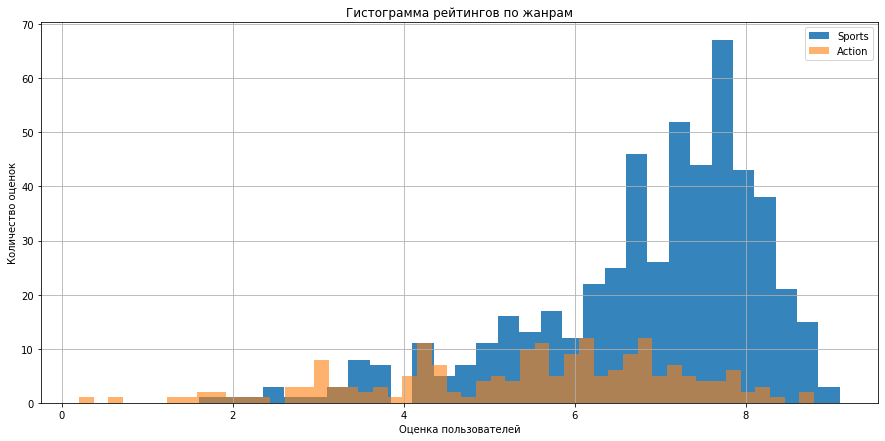

In [78]:
user_score_action.hist(bins=30, alpha = 0.9)
user_score_sports.hist(bins=50, alpha = 0.6, figsize=(15, 7))
plt.title('Гистограмма рейтингов по жанрам')
plt.legend(["Sports", "Action"])
plt.ylabel('Количество оценок')
plt.xlabel('Оценка пользователей');

Диаграмма скошена влево. Выбросы в зонее <3 баллов.

In [79]:
user_score_action = user_score_action[user_score_action>=3]
user_score_sports = user_score_sports[user_score_sports>=3]

Удаляю выбросы.

In [80]:
print('Дисперсия для рейтингов Action: {:.2f}'.format(np.var(user_score_action))) #расcчитываю дисперсии
print('Дисперсия для рейтингов Sports: {:.2f}'.format(np.var(user_score_sports)))

Дисперсия для рейтингов Action: 1.60
Дисперсия для рейтингов Sports: 1.97


Дисперсии не равны.

Выбор критерия для проверки гипотезы:
1. Тип данных: количественные, непрерывные;
2. Данные ведут себя как при нормальном распределении;
3. Данные из выборок независимы друг от друга (в каждой выборке представлены разные игры);
4. В сравнении участвуют средние показатели из выборки.
<br>

Исходя из этих пунктов выбираю критерий Стьюдента (t-test) 
<br>
Исходя из того, что дисперсии выборок не равны,при расчёте передаю параметр <i>equal_var = False</i>.<br>
Пороговое значение alpha - 5%

Формулирую нулевую гипотезу:<br>
Средние пользовательские рейтинги жанров Action и Sports равны.<br>
Альтернативная гипотеза:<br>
Средние пользовательские рейтинги жанра Action отличаются от рейтингов жанра Sports.<br>
<br>
Для проверки гипотез использовал массивы данных с рейтингами, отсортированные по платформе, очищенные от выбросов.<br>

In [81]:
alpha = 0.05 #выбираю значение согласно примеру в теоретической части

results = st.ttest_ind(
    user_score_action, 
    user_score_sports,
    equal_var = False)#дисперсии разные

print('p-значение:{:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.000
Отвергаем нулевую гипотезу


<a id='conclusion5'></a>
### Вывод 5

С высокой вероятностью средние пользовательские рейтинги платформ XOne и PC равны.<br>
Средние пользовательские рейтинги жанра Action отличаются от рейтингов жанра Sports.

<a id='step6'></a>
## Шаг 6. Общий вывод


### Информация о файле
В исходном датафрейме 16715 строк и 11 колонок, имеются пропуски в столбцах: Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.<br>
В сторонних источниках дополнительно были найдены значения столбца Rating с расшифровкой значений рейтинга ESRB.<br><br>
### Подготовка данных
Названия столбцов были приведены к нижнему регистру.<br><br>
В столбце year_of_release были удалены строки с пропусками (1.6% данных);<br>
В столбцах: year_of_release, critic_score тип данных был заменен на int, в столбце user_score на float;<br>
В столбцах: critic_score, name, genre, user_score и rating пропуски были замены на легкосортируемые значения.<br>
<br>
В столбце total_sales были посчитаны суммарные продажи во всех регионах.
<br><br>
### Исследовательский анализ данных
Средний срок существования платформ из ТОП-10 по продажам - 8-12 лет.<br>
Для анализа данных актуальным периодом были приняты данные с 2012 года.<br>

Платформы, актуальные (по которым были продажи) в 2016 году: 3DS, PC, PS3, PS4, PSV, Wii, WiiU, X360, XOne.<br><br>
В 2015 и 2016 годах лидируют по продажам платформы:  PS4, XOne, 3DS.<br>
Платформы, которые ожидаемо будут падать или исчезнут в следующем году, т.к. имеют замены: PS3, X360, Wii.<br>
Соответственно актуальными в 2017 останутся платформы:
1. Консольные: PS4, XOne, WiiU;
2. Карманные: 3DS, PSV;
3. PC.

Остальные либо исчезнут совсем, либо будут иметь минимальные продажи.
<br><br>

Растущие, молодые и потенциально прибыльные платформы: <strong>PS4 и XOne</strong>.<br>
Границы нормального размаха продаж для платформ PS4 и XOne схожи, в среднем они составляют до 1.7 млн копий, однако на PS4 выбросы до 12 млн копий против 7 млн у XOne, что говорит о большей успешности хитовых игр на платформе PS4.<br>
<br>
<br>
На продажи игр влияют:
1. Рейтинги критиков, слабо, для платформ: PS4, XOne, PS3, X360, Wii;
2. Ретинги критиков и пользоваталей, очень слабо: WiiU, 3DS, PC;
3. На продажи платформы PSV не влияют никакие рейтинги.
<br>
<br>

Жанры с высокими продажами: Action, Shooter.<br>
Жанры с низкими продажами: Strategy, Puzzle.<br>
Жанр Action - лидер по количеству выпущенных и проданных игр.<br>
Жанры Shooter и Sport имеют самые высокие показатели проданных игр к выпущенным.<br><br>
### Портрет пользователя каждого региона
Регион Европа:<br>
&bull; топовые платформы PS4 и PS3 (консоли), что говорит о дальнейшем потенциальном росте именно PS4, а не XOne. Карманная платформа с низкой долей продаж - 3DS;<br>
&bull; жанры самых продаваемых игр - Action, Shooter;
&bull; самые продаваемые игры с рейтингом: M и Е.
<br><br>
Регион Северная Америка:<br>
&bull; топовые платформы поддерживают паритет, так PS4 и PS3 в общей доле равны XOne и X360. Соответственно PS4 будет развиваться одинакого с XOne. Карманная платформа с низкой долей продаж - 3DS.<br>
&bull; жанры самых продаваемых игр - Action, Shooter;<br>
&bull; самые продаваемые игры с рейтингом: M и Е.
<br><br>
Регион Япония:<br> 
&bull; топовые платформы представлены карманными 3DS и PSV, в консолях с отрывом от карманных платформ PS3 (вероятен переход на PS4), а платформы XOne и X360 не продаются вообще;<br>
&bull; жанры самых продаваемых игр - Role-Playing, Action;<br>
&bull; большая часть продаж у игр с неисвестным (не установленным) рейтингом, и почти в равных долях E, M, T.
<br><br>
В целом в регионах Европа и Северная Америка портреты пользователей схожи, в то время как в Японии совершенно другие предпочтения как по платформам, так и по жанрам.
<br><br>
### Проверка гипотез
С высокой вероятностью средние пользовательские рейтинги платформ XOne и PC равны.<br>
Средние пользовательские рейтинги жанра Action отличаются от рейтингов жанра Sports.